Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

In [438]:
import warnings
warnings.filterwarnings("ignore")

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

In [399]:
# Basic Packages
import numpy as np
import pandas as pd
import re

# Modeling
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt


In [400]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [401]:
import spacy.cli
#spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')

### Load Competition Data

In [490]:
import pandas as pd

# You may need to change the path
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [491]:
test = pd.read_csv('test.csv')

In [492]:
train = train.set_index('id')

In [493]:
test.head()

id                                        description
0  3461  \nStyle: Speyside single malt scotch Color: Wa...
1  2604  \nVery bright and lively, with a nice balance ...
2  3341  \nA new oloroso-forward Chivas positioned to s...
3  3764  \nAged in bourbon casks and then enhanced in R...
4  2306  \nThere is a freshness to the wood on the nose...

In [494]:
import re

In [495]:
STOP_WORDS = nlp.Defaults.stop_words.union(['like', 'go', 'good', 'great', 'come', 'love', 's', 't', '\n', 'whisky', 'whiskey', 'finish', 'note', 'nose'])

In [496]:
nlp.Defaults.stop_words |= {'like', 'go', 'good', 'great', 'come', 'love', 's', 't', '\n', 'whisky', 'whiskey', 'finish', 'note', 'nose'}

In [497]:
def clean_text(text):
    lower = re.sub('[^a-zA-Z 0-9]', '', text)
    lower = lower.lower()
    return lower

In [498]:
train['description'] = train['description'].apply(clean_text)

In [499]:
test['description'] = test['description'].apply(clean_text)

In [500]:
nlp = spacy.load('en_core_web_lg')

In [501]:
def tokenize(doc, allowed = ['NOUN', 'ADJ', 'VERB', 'ADV']):
    """
    Tokenize & Clean Document Strings
    """
    lemmas = []
    text = nlp(doc)
    nlp.Defaults.stop_words |= {'like', 'go', 'good', 'great', 'come', 'love', 's', 't', '\n', 'whisky', 
                                'whiskey', 'finish', 'note', 'nose', 'dry', 'sweet'}
    
    for token in text: 
        if ((token.is_stop == False) and (token.is_punct == False) and
            (token.pos_ != allowed)):
            lemmas.append(token.lemma_.lower())
    return lemmas

In [454]:
STOP_WORDS

{'\n',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'batched',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'come',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'finish',
 'first',
 'five',
 'for',
 'former',
 'former

In [502]:
test['description']

0       style speyside single malt scotch color walnut...
1       very bright and lively with a nice balance of ...
2       a new olorosoforward chivas positioned to spli...
3       aged in bourbon casks and then enhanced in rio...
4       there is a freshness to the wood on the nose l...
                              ...                        
1017    care for a small batch bourbonmatured blend wi...
1018    this is the pick of the bunch the whisky equiv...
1019    port ellen for sure very oldfashioned in natur...
1020    youthful and very lively bold crisp spices min...
1021    a mashbill of 60201010 cornwheatryemalt aged 3...
Name: description, Length: 1022, dtype: object

In [503]:
test['description'] = test['description'].apply(lambda row: tokenize(row))

In [504]:
train['description'] = train['description'].apply(lambda row: tokenize(row))

In [505]:
test['description'].head()

0    [style, speyside, single, malt, scotch, color,...
1    [bright, lively, nice, balance, flavor, zesty,...
2    [new, olorosoforward, chivas, position, split,...
3    [age, bourbon, cask, enhance, rioja, wine, cas...
4    [freshness, wood, lace, caramel, delicate, min...
Name: description, dtype: object

In [506]:
test['description_str'] = test['description'].astype(str)

In [462]:
def count(tokens):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()
    
    # stores the number of docs that each token appears in 
    appears_in = Counter()

    total_docs = len(tokens)

    for token in tokens:
        # stores count of every appearance of a token 
        word_counts.update(token)
        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in.update(set(token))

    # build word count dataframe
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    
    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')
    
    # percent of docs that a token appears in
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [463]:
wc  = count(train['description'])
wc.head()

word  appears_in  count  rank  pct_total  cul_pct_total  appears_in_pct
141   fruit        1756   2161   1.0   0.012894       0.012894        0.429655
31      oak        1570   2117   2.0   0.012632       0.025526        0.384145
172   spice        1610   2030   3.0   0.012113       0.037639        0.393932
123  palate        1843   1910   4.0   0.011397       0.049035        0.450942
59    sweet        1495   1834   5.0   0.010943       0.059978        0.365794

In [464]:
train['ratingCategory'].unique()

array([1, 0, 2])

In [465]:
zero = train[train['ratingCategory']==0]

In [466]:
one = train[train['ratingCategory']==1]

In [467]:
two = train[train['ratingCategory']==2]

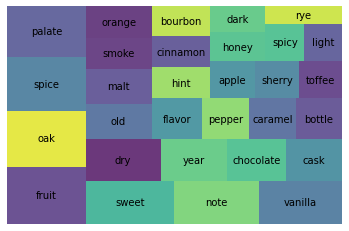

In [468]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

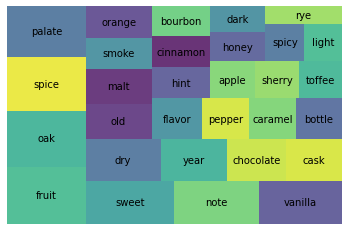

In [469]:
wc_zero = count(zero['description'])

wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

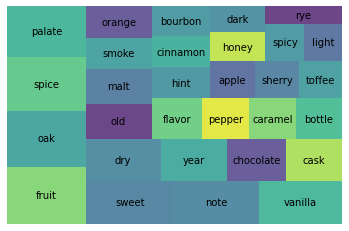

In [470]:
wc_one = count(one['description'])

wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

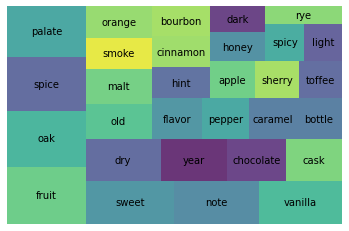

In [471]:
wc_two = count(two['description'])

wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [489]:
wc_two.tail(10)

word  appears_in  count    rank  pct_total  cul_pct_total  \
1106    pungency           1      1  1100.0   0.000425       0.996175   
1102  freshlycut           1      1  1101.0   0.000425       0.996600   
1103      petrol           1      1  1102.0   0.000425       0.997025   
1095        milk           1      1  1103.0   0.000425       0.997450   
1105    overtake           1      1  1104.0   0.000425       0.997875   
1108         far           1      1  1105.0   0.000425       0.998300   
1094       ready           1      1  1106.0   0.000425       0.998725   
1092   distiller           1      1  1107.0   0.000425       0.999150   
1101        suit           1      1  1108.0   0.000425       0.999575   
1096       375ml           1      1  1109.0   0.000425       1.000000   

      appears_in_pct  
1106        0.015385  
1102        0.015385  
1103        0.015385  
1095        0.015385  
1105        0.015385  
1108        0.015385  
1094        0.015385  
1092        0.015385  
1101        0.015385  
1096        0.015385

In [487]:
#wc_one[wc_one['word']=='nose']
wc_one.tail(10)

word  appears_in  count     rank  pct_total  cul_pct_total  \
10695      neutral           1      1  10696.0   0.000008       0.999925   
10694     grandson           1      1  10697.0   0.000008       0.999934   
10696       lambay           1      1  10698.0   0.000008       0.999942   
10699     enthrall           1      1  10699.0   0.000008       0.999950   
10698       floaty           1      1  10700.0   0.000008       0.999959   
10697          782           1      1  10701.0   0.000008       0.999967   
10700    cheerwine           1      1  10702.0   0.000008       0.999975   
10703  penetration           1      1  10703.0   0.000008       0.999983   
10702   connection           1      1  10704.0   0.000008       0.999992   
10704   gluttonous           1      1  10705.0   0.000008       1.000000   

       appears_in_pct  
10695        0.000347  
10694        0.000347  
10696        0.000347  
10699        0.000347  
10698        0.000347  
10697        0.000347  
10700        0.000347  
10703        0.000347  
10702        0.000347  
10704        0.000347

In [488]:
#wc_zero[wc_zero['word']=='nose']
wc_zero.tail(10)

word  appears_in  count    rank  pct_total  cul_pct_total  \
6798        starburst           1      1  6801.0   0.000022       0.999798   
6799         drawback           1      1  6802.0   0.000022       0.999821   
6800           flurry           1      1  6803.0   0.000022       0.999843   
6804          lighten           1      1  6804.0   0.000022       0.999866   
6803           only56           1      1  6805.0   0.000022       0.999888   
6806          50liter           1      1  6806.0   0.000022       0.999910   
6807  surfacetovolume           1      1  6807.0   0.000022       0.999933   
6809            ratio           1      1  6808.0   0.000022       0.999955   
6805         carbolic           1      1  6809.0   0.000022       0.999978   
6808      mediumsweet           1      1  6810.0   0.000022       1.000000   

      appears_in_pct  
6798        0.000876  
6799        0.000876  
6800        0.000876  
6804        0.000876  
6803        0.000876  
6806        0.000876  
6807        0.000876  
6809        0.000876  
6805        0.000876  
6808        0.000876

In [ ]:
finish, note, nose

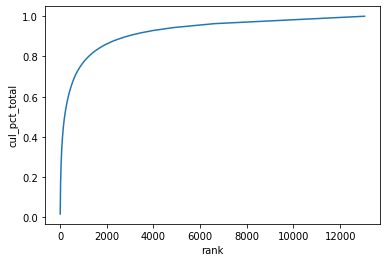

In [248]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [165]:
lemma = []

from spacy.lang.en.stop_words import STOP_WORDS

for token in text: 
    if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False) and (token.pos_ != allowed)):
        lemma.append(token.lemma_.lower())
lemma

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['\n',
 'whisky',
 'leftover',
 'barrel',
 'return',
 'warehouse',
 'canadian',
 'club',
 'recently',
 'pull',
 'vat',
 '1970',
 'acetone',
 'granny',
 'smith',
 'apple',
 'fresh',
 'cut',
 'white',
 'cedar',
 'showcase',
 'long',
 'age',
 'complex',
 'spicy',
 'reserved',
 'dram',
 'ripe',
 'strawberry',
 'can',
 'pear',
 'clove',
 'pepper',
 'faint',
 'flower',
 'slightly',
 'pull',
 'oak',
 'tannin',
 'distinct',
 'elegant',
 'remarkably',
 'vibrant',
 'ancient',
 'canadian',
 'club',
 'tired',
 'australia',
 '\xa0',
 'a$',
 '133']

In [135]:
train['description_str'] = train['description'].astype('str')

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [250]:
train.head()

id                                        description  ratingCategory
0  1321  [whisky, leftover, barrel, return, warehouse, ...               1
1  3861  [uncommon, exclusive, bottling, 6, year, old, ...               0
2   655  [release, port, version, amruts, intermediate,...               1
3   555  [41, year, old, single, cask, age, sherry, but...               1
4  1965  [herbal, nose, aroma, dry, tarragon, parsley, ...               1

In [507]:
from sklearn.model_selection import train_test_split

# Create the features and target
X = train['description']
y = train['ratingCategory']
X = X.astype('str')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Function to return the vector for each sentence in a document
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

# Get the vectors for each sentence (mean of all the word vectors)
X_train = get_word_vectors(X_train)
X_test = get_word_vectors(X_test)

from sklearn.linear_model import LogisticRegression

# Instantiate the classifier (defaults)
classifier = LogisticRegression(solver='lbfgs')

# Fit the model
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

# Print out the accuracy score
print("Accuracy including word embeddings: ", score)

Accuracy including word embeddings:  0.7560975609756098


In [514]:
testing_data = get_word_vectors(test['description_str'])

In [515]:
testing_data

[array([-0.17572586,  0.46377242, -0.03242332, -0.09121294,  0.4137161 ,
         0.06563699,  0.24471653, -0.11275999, -0.2825066 ,  1.3528116 ,
        -0.2428382 , -0.03523624,  0.3129573 , -0.04940651, -0.15404648,
         0.08116649, -0.05426399,  0.87880224, -0.05145166, -0.10528549,
        -0.21004097,  0.316387  , -0.0042652 ,  0.09436337,  0.24292904,
        -0.32005182,  0.15507203,  0.1410426 ,  0.44393367, -0.2215301 ,
        -0.23774654,  0.05518677, -0.05634452,  0.0830747 ,  0.24881844,
        -0.05076142,  0.04834743,  0.01629611, -0.16394483, -0.00693873,
        -0.14125682, -0.23655991, -0.05473059, -0.12485695,  0.08349351,
        -0.10533322,  0.05040394,  0.04927657,  0.06509613,  0.21300937,
         0.0731366 , -0.01944382, -0.0906034 ,  0.1648217 , -0.07877947,
         0.01527988,  0.14700565, -0.13946043, -0.05806964, -0.05473227,
         0.03858408,  0.03127601,  0.45530605,  0.07583643,  0.30025506,
        -0.0665097 ,  0.05656591, -0.1847322 , -0.0

In [313]:
X_test

[array([-1.77271187e-01,  4.67083454e-01, -8.78572348e-04, -1.06635250e-01,
         4.30445641e-01,  9.99494717e-02,  2.53136784e-01, -1.15032285e-01,
        -2.70306677e-01,  1.39877665e+00, -2.28008106e-01, -2.00168937e-02,
         3.13916773e-01, -3.33329141e-02, -1.37682110e-01,  7.73245394e-02,
        -9.36939344e-02,  8.70147884e-01, -7.49917552e-02, -1.08590476e-01,
        -1.95435584e-01,  3.12385321e-01, -1.68530848e-02,  8.57880712e-02,
         2.60489523e-01, -3.14544350e-01,  1.10574245e-01,  1.14092864e-01,
         4.36894357e-01, -2.19717547e-01, -2.52727687e-01,  3.74060981e-02,
        -3.68693024e-02,  1.05491132e-01,  1.92198336e-01, -5.66186681e-02,
         5.90356812e-02,  3.42758335e-02, -1.55483693e-01,  6.45713741e-03,
        -1.44109398e-01, -2.30036065e-01, -5.74004315e-02, -1.16473272e-01,
         7.83327296e-02, -1.30966634e-01,  4.57489863e-02,  7.83065110e-02,
         6.97574466e-02,  1.96175829e-01,  1.00484580e-01, -1.45344157e-02,
        -1.0

In [512]:
a = test['description']

In [513]:
classifier.predict(testing_data)

array([1, 1, 1, ..., 1, 1, 0])

### Define Pipeline Components

In [140]:
vect = TfidfVectorizer(stop_words="english")
clf = RandomForestClassifier()

pipe = Pipeline([('vect', vect), ('clf', clf)])

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [141]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, Y_train)

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: could not convert string to float: "[' ', 'whisky', 'batch', 'leftover', 'barrel', 'return', 'warehouse', 'canadian', 'club', 'recently', 'pull', 'vat', 's', 'acetone', 'granny', 'smith', 'apple', 'fresh', 'cut', 'white', 'cedar', 'showcase', 'long', 'age', 'complex', 'spicy', 'reserve', 'dram', 'ripe', 'strawberry', 'can', 'pear', 'clove', 'pepper', 'faint', 'flower', 'slightly', 'pull', 'oak', 'tannin', 'distinct', 'elegant', 'remarkably', 'vibrant', 'ancient', 'canadian', 'club', 'tired', 'australia']"

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [145]:
parameters = {
    # exclude tokens that appear in range
    "vect__max_df": (0.9, 1.0),
    "vect__min_df": (2, 10),
    "vect__max_features": [500, 1000],
    # included parameters for our ML model
    # it would be wise to include 1000
    "clf__n_estimators": [10, 100],
    "clf__max_depth": [None, 10]
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=4, verbose=1)

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
grid_search.fit(X_train, Y_train)

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'clf__max_depth': [None, 10],
                         'clf__n_estimators': [10, 100],
                         'vect__max_df': (0.9, 1.0),
                         'vect__max_features': [500, 1000],
                         'vect__min_df': (2, 10)},
             verbose=1)

In [147]:
grid_search.best_score_

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7394181707182039

In [148]:
grid_search.best_params_

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'clf__max_depth': None,
 'clf__n_estimators': 100,
 'vect__max_df': 0.9,
 'vect__max_features': 1000,
 'vect__min_df': 2}

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [297]:
test['description']

id
3461    [style, speyside, single, malt, scotch, color,...
2604    [bright, lively, nice, balance, flavor, zesty,...
3341    [new, olorosoforward, chivas, position, split,...
3764    [age, bourbon, cask, enhance, rioja, wine, cas...
2306    [freshness, wood, nose, lace, caramel, delicat...
                              ...                        
2853    [care, small, batch, bourbonmatured, blend, 20...
219     [pick, bunch, whisky, equivalent, fountain, wa...
1286    [port, ellen, sure, oldfashioned, nature, inte...
2201    [youthful, lively, bold, crisp, spice, mint, c...
4019    [mashbill, 60201010, cornwheatryemalt, age, 3,...
Name: description, Length: 1022, dtype: object

In [301]:
clf.predict(test['description'])

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [516]:
# Predictions on test sample
pred = classifier.predict(testing_data)
#pred = grid_search.predict(test['description'])

In [517]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [518]:
# Make Sure the Category is an Integer
submission.head()

id  ratingCategory
0  3461               1
1  2604               1
2  3341               1
3  3764               1
4  2306               1

In [152]:
subNumber = 0

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [519]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 80% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [158]:
vect = TfidfVectorizer()

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [161]:
X_dtm = vect.fit_transform(X_train)

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [163]:
X_dtm[0]

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<1x9819 sparse matrix of type '<class 'numpy.float64'>'
	with 44 stored elements in Compressed Sparse Row format>

In [154]:
from sklearn.decomposition import TruncatedSVD

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [155]:
vect = TfidfVectorizer()
svd = TruncatedSVD()
clf = RandomForestClassifier()
lsi = Pipeline([('vect', vect),
               ('svd', svd)])

pipe = Pipeline([('lsi', lsi), ('clf', clf)])

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [156]:
parameters = {
    'lsi__svd__n_components': [10,100,250],
    'lsi__vect__max_df': (0.07, 0.75, 0.8, 1.0),
    'clf__max_depth':(20, 30),
    'clf__n_estimators': (1000, 1500)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(X_train, Y_train)

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('lsi',
                                        Pipeline(steps=[('vect',
                                                         TfidfVectorizer()),
                                                        ('svd',
                                                         TruncatedSVD())])),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'clf__max_depth': (5, 10, 15, 20),
                         'clf__n_estimators': (100, 1000),
                         'lsi__svd__n_components': [10, 100, 250],
                         'lsi__vect__max_df': (0.75, 1.0)},
             verbose=1)

In [157]:
grid_search.best_score_

/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-gQtURTt4/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7259605629756429

In [198]:
grid_search.best_params_

{'clf__max_depth': 20,
 'clf__n_estimators': 1000,
 'lsi__svd__n_components': 10,
 'lsi__vect__max_df': 0.75}

### Make a Submission File

In [146]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [147]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [148]:
# Make Sure the Category is an Integer
submission.head()

id  ratingCategory
0  3461               1
1  2604               1
2  3341               1
3  3764               1
4  2306               1

In [150]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [199]:
# Apply to your Dataset

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import randint

param_dist = {
    
    'max_depth' : randint(3,10),
    'min_samples_leaf': randint(2,15)
}

In [200]:
# Continue Word Embedding Work Here
nlp = spacy.load("en_core_web_lg")

def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [201]:
X_train_2 = get_word_vectors(X_train)
X_test_2 = get_word_vectors(X_test)

NameError: name 'X_test' is not defined

In [ ]:
rfc = RandomForestClassifier(oob_score=True)

In [ ]:
rfc.fit(X_train, Y_train);

In [ ]:
rfc.score(X_train, Y_train)

In [ ]:
rfc.oob_score_

### Make a Submission File

In [ ]:
# Predictions on test sample
pred = ...predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 80% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?